#Importing all libraries required in this notebook
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegession
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

In [8]:
data.head(5)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


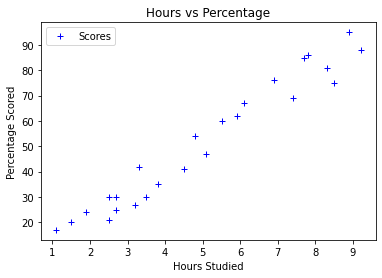

In [16]:
#plotting the distribution of scores
data.plot(x='Hours',y='Scores',style='+',color='Blue')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

In [17]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [18]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [19]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [21]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

In [22]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


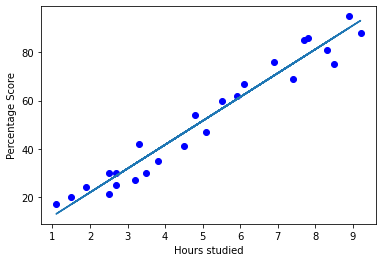

In [24]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y,color='Blue')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.plot(x,line);
plt.show()

In [25]:
print(x_test) 
# Testing data - In Hours
y_pred = regressor.predict(x_test)
# Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [26]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [28]:
df=pd.DataFrame({'Actual':y_test,'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<AxesSubplot:>

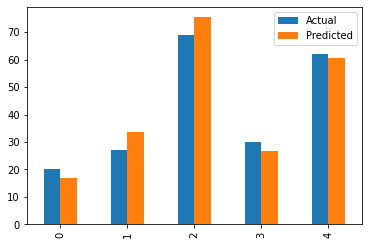

In [29]:
df.plot(kind='bar')

In [30]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [32]:
print('R square value for train data is',regressor.score(x_train,y_train))

R square value for train data is 0.9515510725211552


In [33]:
print('R square value for train data is',regressor.score(x_test,y_test))

R square value for train data is 0.9454906892105356


In [36]:
# if student studies for 9.25hrs/day
hours = 9.25
test=np.array([hours])
test=test.reshape(-1,1)
pred = regressor.predict([[9.5]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 96.16939660753593
